# IMPORTS

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image as Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import os

# DEFINE TRAINING AND VALIDATION SETS

In [2]:
dataset_directory = "dataset"

# allocate 20% percent of the dataset to the validation set
# create training set
training_set = image_dataset_from_directory(
    dataset_directory,
    labels="inferred",
    label_mode="int",
    class_names=["0", "1", "2", "3", "4", 
                 "5", "6", "7", "8", "9"],
    color_mode="grayscale",
    batch_size=16,
    image_size=(32,32),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
)

# create validation set
validation_set = image_dataset_from_directory(
    dataset_directory,
    labels="inferred",
    label_mode="int",
    class_names=["0", "1", "2", "3", "4",
                 "5", "6", "7", "8", "9"],
    color_mode="grayscale",
    batch_size=1,
    image_size=(32,32),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
)

Found 616 files belonging to 10 classes.
Using 493 files for training.
Found 616 files belonging to 10 classes.
Using 123 files for validation.


# PLOT SOME SAMPLES FROM TRAINING SET

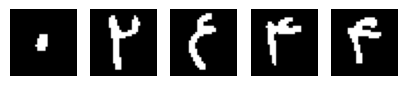

In [3]:
fig, ax = plt.subplots(1, 5, figsize=(5,7))

for images, labels in training_set.take(10):
    for i in range(5):
        ax[i].imshow(images[i].numpy().astype("uint8"), cmap="gray")
        ax[i].axis("off")

# BUILD A LeNet5 NETWORK

In [4]:
def LeNet5():
    """
    This function creates a LeNet5 network using sequential model.
    """
    model = Sequential([
        Conv2D(filters=6, kernel_size=(5,5), input_shape=(32,32,1), padding="valid", activation="relu", name="Layer1_Conv2D"),
        AveragePooling2D(pool_size=(2,2), strides=(2,2), name="Layer1_AvgPooling"),
        Conv2D(filters=16, kernel_size=(5,5), padding="valid", activation="relu", name="Layer2_Conv2D"),
        AveragePooling2D(pool_size=(2,2), strides=(2,2), name="Layer2_AvgPooling"),
        Flatten(name="Flatten"),
        Dense(units=120, activation="relu", name="Layer3_Dense"),
        Dense(units=84, activation="relu", name="Layer4_Dense"),
        Dense(units=10, activation="softmax", name="Layer5_Dense")
    ], name="LeNet_5")
    return model

Create a network

In [5]:
LeNet5_model = LeNet5()
LeNet5_model.summary()

Model: "LeNet_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1_Conv2D (Conv2D)      (None, 28, 28, 6)         156       
                                                                 
 Layer1_AvgPooling (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 Layer2_Conv2D (Conv2D)      (None, 10, 10, 16)        2416      
                                                                 
 Layer2_AvgPooling (AverageP  (None, 5, 5, 16)         0         
 ooling2D)                                                       
                                                                 
 Flatten (Flatten)           (None, 400)               0         
                                                                 
 Layer3_Dense (Dense)        (None, 120)               4812

# COMPILE AND FIT THE MODEL

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
acc = tf.keras.metrics.SparseCategoricalAccuracy()

LeNet5_model.compile(optimizer=opt, loss=loss, metrics=[acc])

Define a learning rate scheduler

In [7]:
def lr_scheduler(epoch, lr):
    """
    This function operates so that divides the learning rate value
    by 1.5 each 10 epochs and returns the newly calculated learning rate 
    """
    if (epoch) % 10 == 0:
        lr /= 1.5
    return lr

# TRAIN THE MODEL

In [8]:
history = LeNet5_model.fit(training_set, epochs=20, validation_data=validation_set,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)], verbose=False)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


# PLOT TRAIN AND VALIDATION ACCURACY

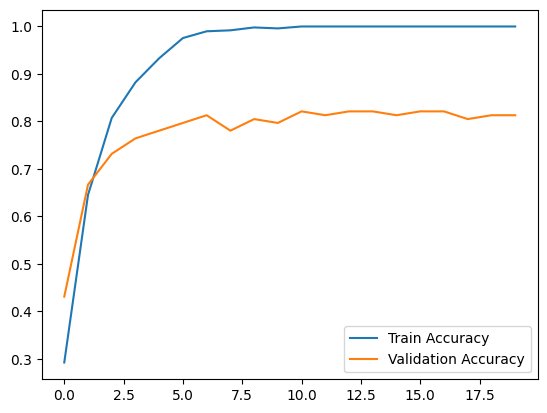

Train Loss: 0.011
Train Accuracy: 100.000%
Validation Loss: 0.424
Validation Accuracy: 81.301%


In [9]:
plt.plot(history.epoch, history.history["sparse_categorical_accuracy"], label="Train Accuracy")
plt.plot(history.epoch, history.history["val_sparse_categorical_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

train_loss = history.history["loss"][-1]
train_acc = history.history["sparse_categorical_accuracy"][-1]
val_loss = history.history["val_loss"][-1]
val_acc = history.history["val_sparse_categorical_accuracy"][-1]
print(f"Train Loss: {train_loss:.3f}")
print(f"Train Accuracy: {train_acc*100:.3f}%")
print(f"Validation Loss: {val_loss:.3f}")
print(f"Validation Accuracy: {val_acc*100:.3f}%")

The above plot shows overfitting

# PREDICT ON UNSEEN IMAGES
Create test set

In [10]:
testdata_directory = "test_set"
test_images_path = [os.path.join(testdata_directory, image) for image in sorted(os.listdir(testdata_directory))]
num_test_images = len(test_images_path)

img = Image.load_img(test_images_path[0], color_mode="grayscale")
img_array = Image.img_to_array(img)
img_height, img_width, num_channels = img_array.shape

test_set = np.zeros((num_test_images, img_height, img_width, num_channels))

for i in range(num_test_images):
    img = Image.load_img(test_images_path[i], color_mode="grayscale")
    img_array = Image.img_to_array(img)
    test_set[i] = img_array

Plot some samples from test set

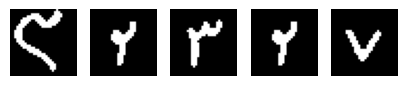

In [11]:
import random

fig, ax = plt.subplots(1, 5, figsize=(5,3))

for i in range(5):
    random_num = random.randint(0, len(test_set)-1)
    ax[i].imshow(test_set[random_num], cmap="gray")
    ax[i].axis("off")

Predictions on test set

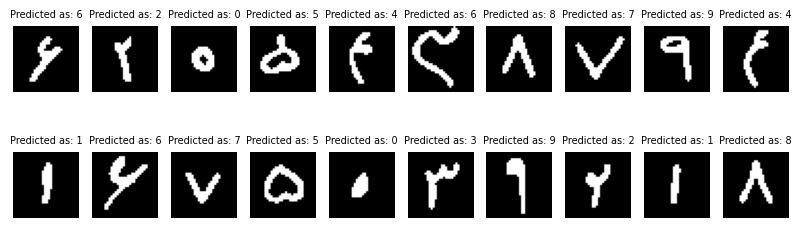

In [12]:
prediction = LeNet5_model.predict(test_set, verbose=False)

fig, ax = plt.subplots(2, 10, figsize=(10, 3))
for i, ax in enumerate(ax.flat):
    ax.imshow(test_set[i], cmap="gray")
    ax.axis("off")
    ax.set_title(f"Predicted as: {np.argmax(prediction[i])}", fontsize=7)

# DATA AUGMENTATION


In [13]:
from tensorflow.keras.layers import RandomRotation

def rotation(image, label):
    """
    This function rotates images randomly by the factor of a
    fraction of 2Pi
    """
    rotate = RandomRotation(factor=(-0.05,0.05))
    return rotate(image), label

aug_training_set = training_set.map(rotation)

# DISPLAY SOME SAMPLES FROM AUGMENTED TRAINING SET

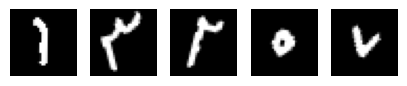

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(5,7))
 
for images, labels in aug_training_set.take(20):
    for i in range(5):
        ax[i].imshow(images[i].numpy().astype("uint8"), cmap="gray")
        ax[i].axis("off")

Create a new network and compile
Train the model with newly augmented dataset

In [15]:
LeNet5_model_aug = LeNet5()

opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
acc = tf.keras.metrics.SparseCategoricalAccuracy()

LeNet5_model_aug.compile(optimizer=opt, loss=loss, metrics=[acc])

history_aug = LeNet5_model_aug.fit(training_set, epochs=20, validation_data=validation_set,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)], verbose=False)

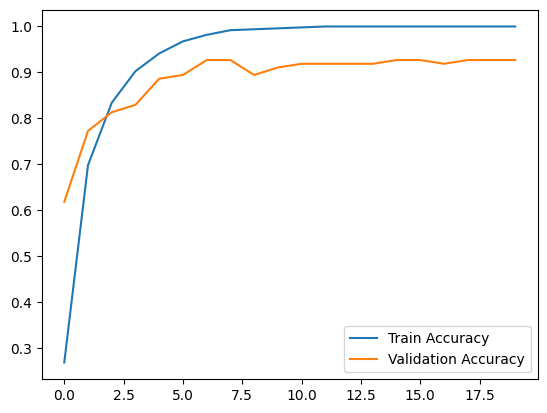

Train Loss: 0.009
Train Accuracy: 100.000%
Validation Loss: 0.316
Validation Accuracy: 92.683%


In [16]:
plt.plot(history_aug.epoch, history_aug.history["sparse_categorical_accuracy"], label="Train Accuracy")
plt.plot(history_aug.epoch, history_aug.history["val_sparse_categorical_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

train_loss = history_aug.history["loss"][-1]
train_acc = history_aug.history["sparse_categorical_accuracy"][-1]
val_loss = history_aug.history["val_loss"][-1]
val_acc = history_aug.history["val_sparse_categorical_accuracy"][-1]
print(f"Train Loss: {train_loss:.3f}")
print(f"Train Accuracy: {train_acc*100:.3f}%")
print(f"Validation Loss: {val_loss:.3f}")
print(f"Validation Accuracy: {val_acc*100:.3f}%")

Prediction on test set

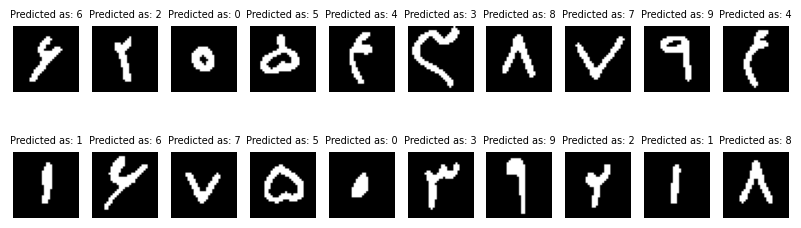

In [17]:
prediction = LeNet5_model_aug.predict(test_set, verbose=False)

fig, ax = plt.subplots(2, 10, figsize=(10, 3))
for i, ax in enumerate(ax.flat):
    ax.imshow(test_set[i], cmap="gray")
    ax.axis("off")
    ax.set_title(f"Predicted as: {np.argmax(prediction[i])}", fontsize=7)